In [143]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import getpass

browser = webdriver.PhantomJS()
browser.get('https://vamps2.mbl.edu/users/login')

user = input("Enter your VAMPS username: ")
password = getpass.getpass("Enter your VAMPS password: ")

browser.find_element_by_id("username").send_keys(user)
browser.find_element_by_id("password").send_keys(password)
browser.find_element_by_id("password").submit();

browser.save_screenshot('screen.png')

Enter your VAMPS username: ruzics
Enter your VAMPS password: ········


True

In [136]:
import json, string
#take in config file to change
file = input("Enter JSON Config File: ")
new_data = input("Enter the Dataset IDs you wish to view: ")
image = input('Enter image to display ("dheatmap", "piecharts", "barcharts", "counts_matrix", "metadata_table", "fheatmap", "dendrogram01", "dendrogram03", "pcoa", "pcoa3d", "geospatial", "adiversity", "none"): ')
for ch in string.punctuation:  #standardize ID input                                                                                                   
    new_data = new_data.replace(ch, " ")
new_data = list(new_data.split(" "))
new_data = list(filter(None, new_data))

Enter JSON Config File: test_config.json
Enter the Dataset IDs you wish to view: "348474","348475","348476","348477","348478","348479","348480","348481","348482","348483","348484"
Enter image to display ("dheatmap", "piecharts", "barcharts", "counts_matrix", "metadata_table", "fheatmap", "dendrogram01", "dendrogram03", "pcoa", "pcoa3d", "geospatial", "adiversity", "none"): piecharts


In [137]:
with open(file) as f:
    config_string = json.load(f)
#change config file to match new image/dataset 
if 'names' in config_string['id_name_hash']:
    del config_string['id_name_hash']['names']
config_string['image'] = image
config_string['id_name_hash']['ids'] = new_data
#rewrite json file that was input
with open(file,'w') as f:
    f.write(json.dumps(config_string))

In [138]:
#upload new config file to VAMPS remotely
browser.save_screenshot('screen.png')
browser.get('https://vamps2.mbl.edu/user_data/upload_configuration')
uploadElement = browser.find_element_by_name("upload_files")
uploadElement.send_keys(file);
browser.find_element_by_name("upload_files").submit()
browser.save_screenshot('screen.png')

True

In [139]:
link = image + '_open_btn'
browser.find_element_by_id(link).click()
main_window_handle = browser.current_window_handle
signin_window_handle = None
while not signin_window_handle:
    for handle in browser.window_handles:
        if handle != main_window_handle:
            signin_window_handle = handle
            break
browser.switch_to.window(signin_window_handle)
browser.maximize_window()
browser.save_screenshot('screen.png')
browser.switch_to.window(main_window_handle)

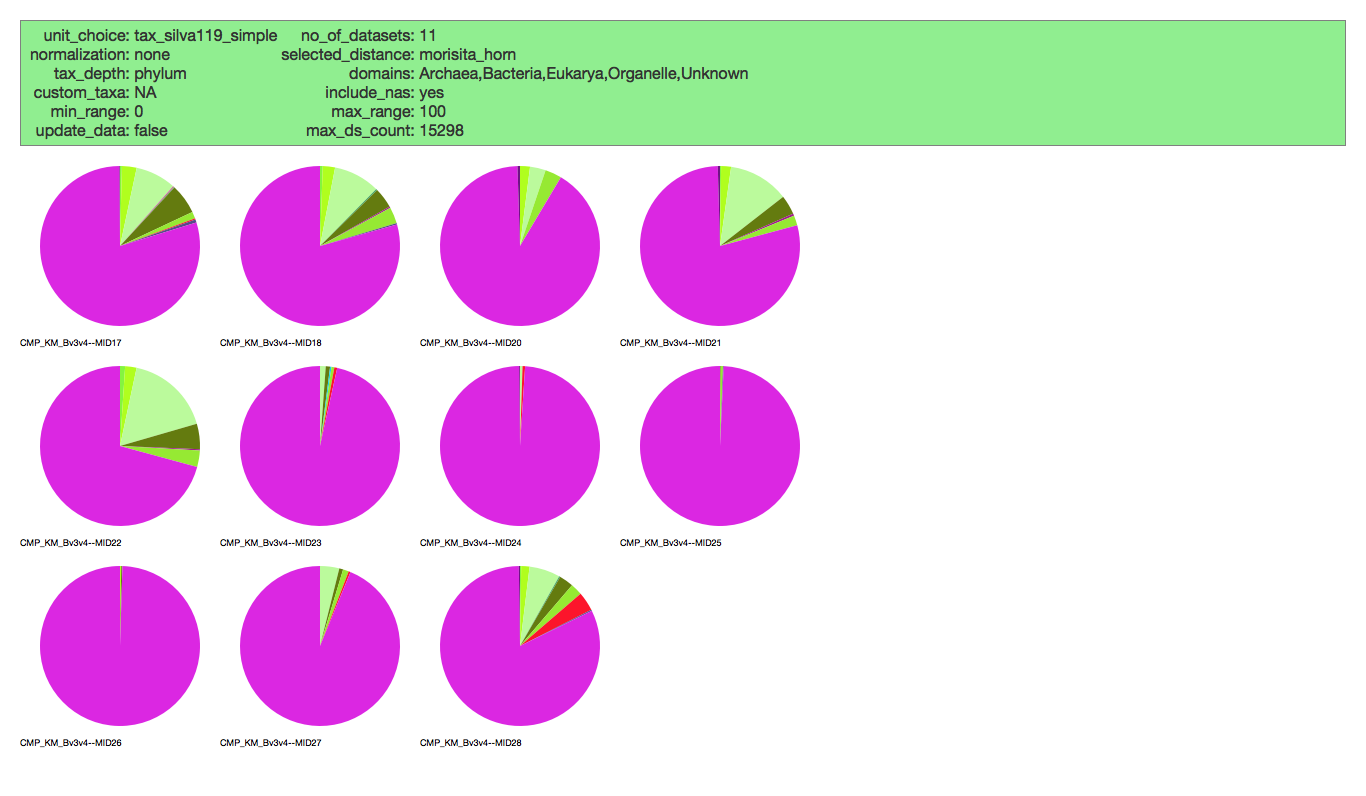

In [140]:
from IPython.display import Image
Image(filename='screen.png') 